# Librerías necesarias

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from numpy import mean

from sklearn import preprocessing
from skfuzzy.cluster import cmeans
import matplotlib.pyplot as plt
import seaborn as sns

# import sys
# sys.path.append("/Users/aitor/Library/Python/3.9/lib/python/site-packages")

# 1. Segmentación de clientes

In [50]:
clientes = pd.read_csv('csv/Mall_Customers.csv')
clientes

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [51]:
clientes.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [52]:
clientes.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [53]:
clientes.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


/var/folders/30/kj50lt897c9gb579zv_k_5t00000gn/T/ipykernel_5374/3308983097.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(clientes.corr(), square=True, annot=True, linewidths=2)


<Axes: >

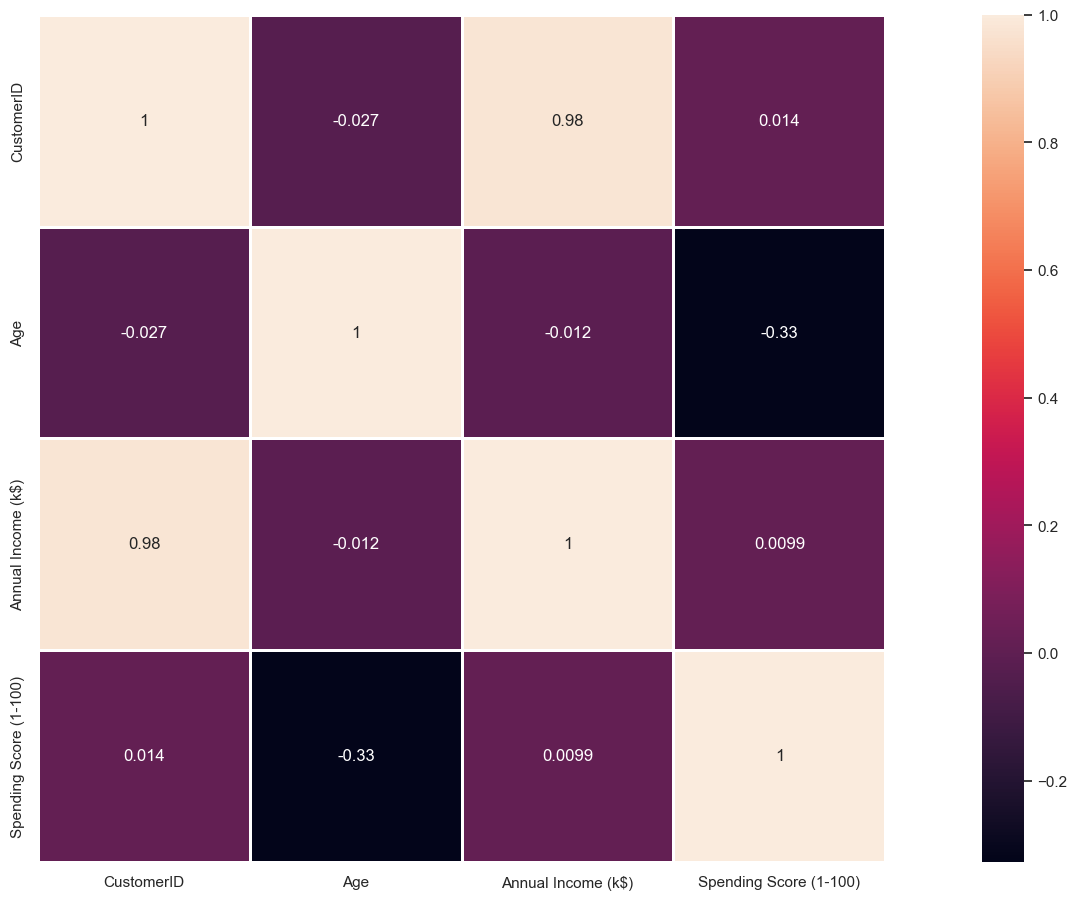

In [54]:
sns.set()
fig, ax = plt.subplots(figsize=(25,11))    
sns.heatmap(clientes.corr(), square=True, annot=True, linewidths=2)

In [55]:
clientes = clientes.drop('CustomerID', axis=1)

In [56]:
le = preprocessing.LabelEncoder() 
clientes['Gender'] = le.fit_transform(clientes.Gender.values)
clientes

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [57]:
X = clientes.to_numpy()

In [58]:
N = X.shape[0]
K = 4
SSE = []

for i in range(0, N):
  X_sin_i = np.delete(X, i, axis=0)
  kmeans = KMeans(n_clusters=K, n_init=10, random_state=100).fit(X_sin_i)
  SSE.append(kmeans.inertia_)

In [59]:
sigma = np.std(SSE)
mu = np.mean(SSE)

# 2 para distribución normal
# 3 para cualquier otra distribución
umbral = 2

outliers = []
for i in range(0, N):
  if np.abs(SSE[i]-mu) > umbral*sigma:
    outliers.append(i)
print(outliers)

[2, 6, 8, 10, 12, 14, 22, 30, 32, 196, 197, 198, 199]


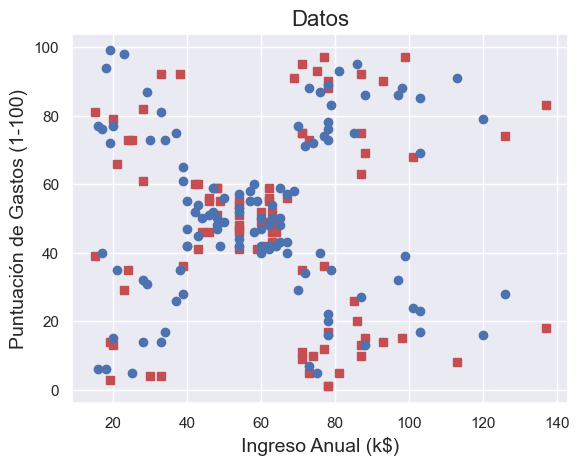

In [60]:
X = clientes[["Annual Income (k$)", "Spending Score (1-100)"]].values

# Graficar los datos
plt.plot(X[clientes["Gender"]==1, 0], X[clientes["Gender"]==1, 1], 'rs') # 'rs' -> red square
plt.plot(X[clientes["Gender"]==0, 0], X[clientes["Gender"]==0, 1], 'bo') # 'bo' -> blue circulos
plt.title("Datos", fontsize=16) # titulo
plt.xlabel("Ingreso Anual (k$)", fontsize=14) # etiquetas del eje x
plt.ylabel("Puntuación de Gastos (1-100)", fontsize=14) # etiquetas del eje y
plt.show()

In [61]:
# inicializar kmeans
# n_cluster -> numero de grupos ; random_state -> semilla
kmeans = KMeans(n_clusters=2, random_state=10)

# entrenamiento (ajustar el modelo)
kmeans.fit(X)

# prediccion -> devuelve array con el número de grupo al que pretenece cada dato
pred = kmeans.predict(X) # También puede utilizarse kmeans.fit_predict(X) realiza ambas etapas

# obtener centroides de los grupos
centroides = kmeans.cluster_centers_
print(centroides)
pred

[[37.28888889 50.28888889]
 [79.6        50.12727273]]


/Users/aitor/Desktop/sist_aprendizaje_aut.nosync/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

/var/folders/30/kj50lt897c9gb579zv_k_5t00000gn/T/ipykernel_5374/3689963247.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


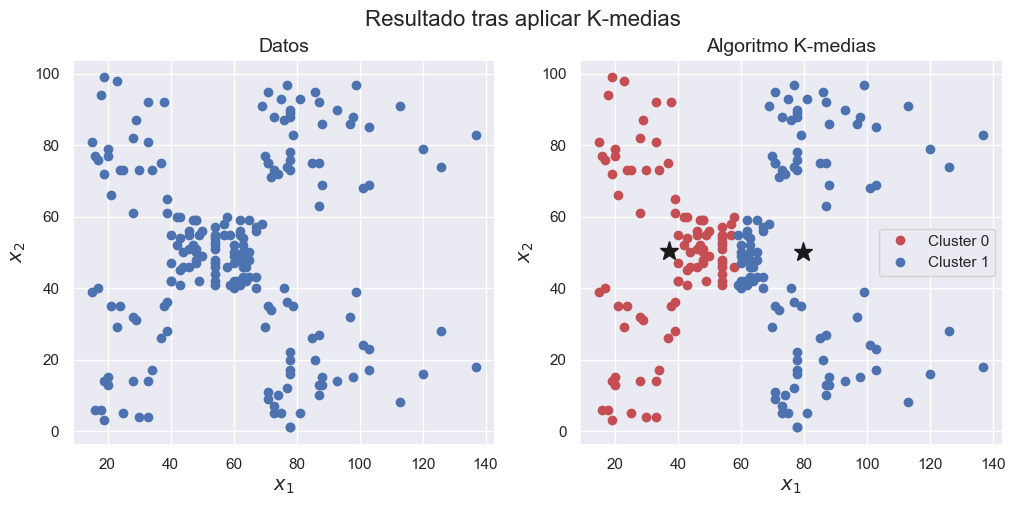

In [62]:
## Representación gráfica de la solución
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 5)
fig.suptitle('Resultado tras aplicar K-medias', fontsize=16)

ax1.plot(X[:20, 0], X[:20, 1], 'bo')
ax1.plot(X[20:, 0], X[20:, 1], 'bo')
ax1.set_title("Datos", fontsize=14)
ax1.set_xlabel(r"$x_1$", fontsize=14)
ax1.set_ylabel(r"$x_2$", fontsize=14)

ax2.plot(X[pred==0, 0], X[pred==0, 1], 'ro', label="Cluster 0") 
ax2.plot(X[pred==1, 0], X[pred==1, 1], 'bo', label="Cluster 1") 
ax2.plot(centroides[:, 0], centroides[:, 1], 'k*', markersize=14) # Dibujamos los centroides
ax2.legend()
ax2.set_title("Algoritmo K-medias", fontsize=14)
ax2.set_xlabel(r"$x_1$", fontsize=14)
ax2.set_ylabel(r"$x_2$", fontsize=14)

fig.show()

In [63]:
def BIC(K, grupos, X):
    filas, columnas = X.shape

    N = filas
    P = columnas

    sumatorio = 0.0
    var_estimada = 0.0

    for k in range(0, K):
        suma_var_estimada = 0.0
        nk =sum(grupos==k)
        for j in range(0, P):
            sigma_j = np.square(np.std(X[:, j]))
            sigma_jk = np.square(np.std(X[grupos==k, j]))
            suma_var_estimada += 0.5 * np.log(sigma_j + sigma_jk)
        
        sumatorio += -nk * suma_var_estimada
    
    homogeneidad = -2 * sumatorio

    coste_centroides = 2 * K * P * np.log(N)
    bic = homogeneidad + coste_centroides
    return bic

In [73]:
K

2

In [71]:
bic = BIC(K, grupos, X)
print(bic)

2862.205558449572


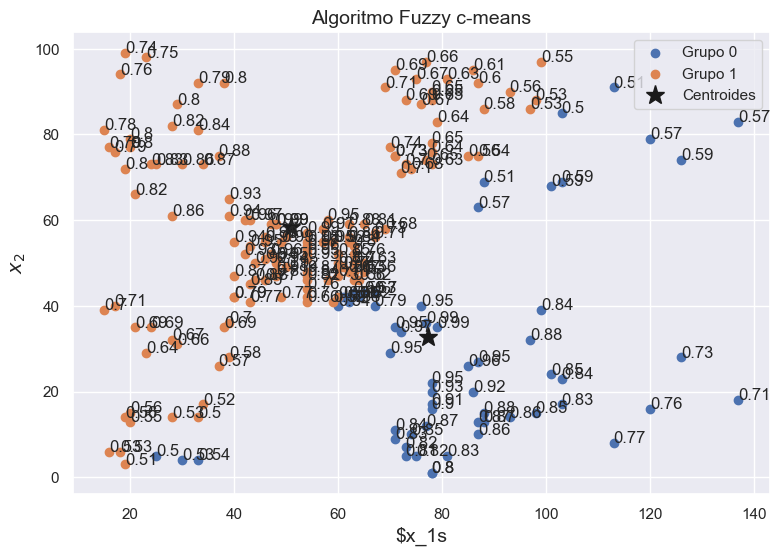

In [64]:
K = 2 # Número de clusters
m = 2 # Parámetro de FCM, 2 es el defecto
tolerancia = 1e-5 # Tolerancia (criterio de parada)
maxiter = 100 # Número máximo de iteraciones

centroides, U, u0, d, jm, p, fpc = cmeans(X.T, K, m, tolerancia, maxiter, seed=100)
# Parámetros de salida:
# - centroides: Centroides
# - U: Matriz de pertenencia de los indiviuos a los clusters
# - u0: Matriz u en la iteración 0
# - d: Matriz de distancias Euclideas en la última iteración # - jm: Historico del valor de la función objetivo # - p: Número de iteraciones
# - fpc: Coeficiente de partición difusa final

# Obtener a que grupo pertenece cada observación
grupos = np.argmax(U, axis=0) # Devuelve los indices del valor máximo sobre el eje 0 (filas)

# Obtener el grado de pertenencia al grupo con mayor pertenencia
maxU = np.amax(U, axis=0) # Devuelve el valor máximo sobre el eje 0 (filas)

# representación

plt.figure(figsize= (9, 6))

for k in range (0, K):
    plt.scatter(X[grupos==k, 0], X[grupos==k, 1], label="Grupo {}".format(k))

for i, maxU_i in enumerate (np.round(maxU, 2)):
    plt.annotate (maxU_i, (X[i, 0], X[i, 1]))

# Dibujamos los centroides
plt.plot(centroides[:, 0], centroides[:, 1], 'k*', markersize=14, label="Centroides")

plt.title ("Algoritmo Fuzzy c-means", fontsize=14)
plt.xlabel (r"$x_1s", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14)
plt.legend()
plt.show()

In [ ]:
columnas = ['edad', 'altura', 'peso']
centroides.columns = columnas

In [67]:
# Crear un diccionario con los valores de los centros de los clusters
centros_dict = {}
for i in range(k):
    centros_dict[f'Grupo {i+1}'] = kmeans.cluster_centers_[i]

# Crear el dataframe a partir del diccionario
centroides = pd.DataFrame(centros_dict).T
centroides.columns = X.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [66]:
# Crear dataframe temporal con los centros de cada cluster
centroides = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

# Agregar una columna con el número de cluster
centroides['Grupo'] = range(1, k + 1)

# Unir los dataframes cluster_table y centroides por la columna 'Grupo'
cluster_table = pd.merge(cluster_table, centroides, on='Grupo')

# Seleccionar las columnas deseadas y renombrarlas
cluster_table = cluster_table[['Grupo', 'Observaciones'] + list(X.columns)]
cluster_table.columns = ['Grupo', 'Observaciones'] + [f'Centroide_{col}' for col in X.columns]

# Mostrar la tabla resultante
print(cluster_table.groupby('Grupo').agg({'Observaciones': 'count', 'Centroide_Edad': 'first', 'Centroide_Ingresos': 'first'}))



AttributeError: 'numpy.ndarray' object has no attribute 'columns'

# 2. Segmentación de países

In [21]:
pais = pd.read_csv('csv/country-data.csv')
pais

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [22]:
pais.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [23]:
pais.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [24]:
pais.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


/var/folders/30/kj50lt897c9gb579zv_k_5t00000gn/T/ipykernel_5374/912511983.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(pais.corr(), square=True, annot=True, linewidths=2)


<Axes: >

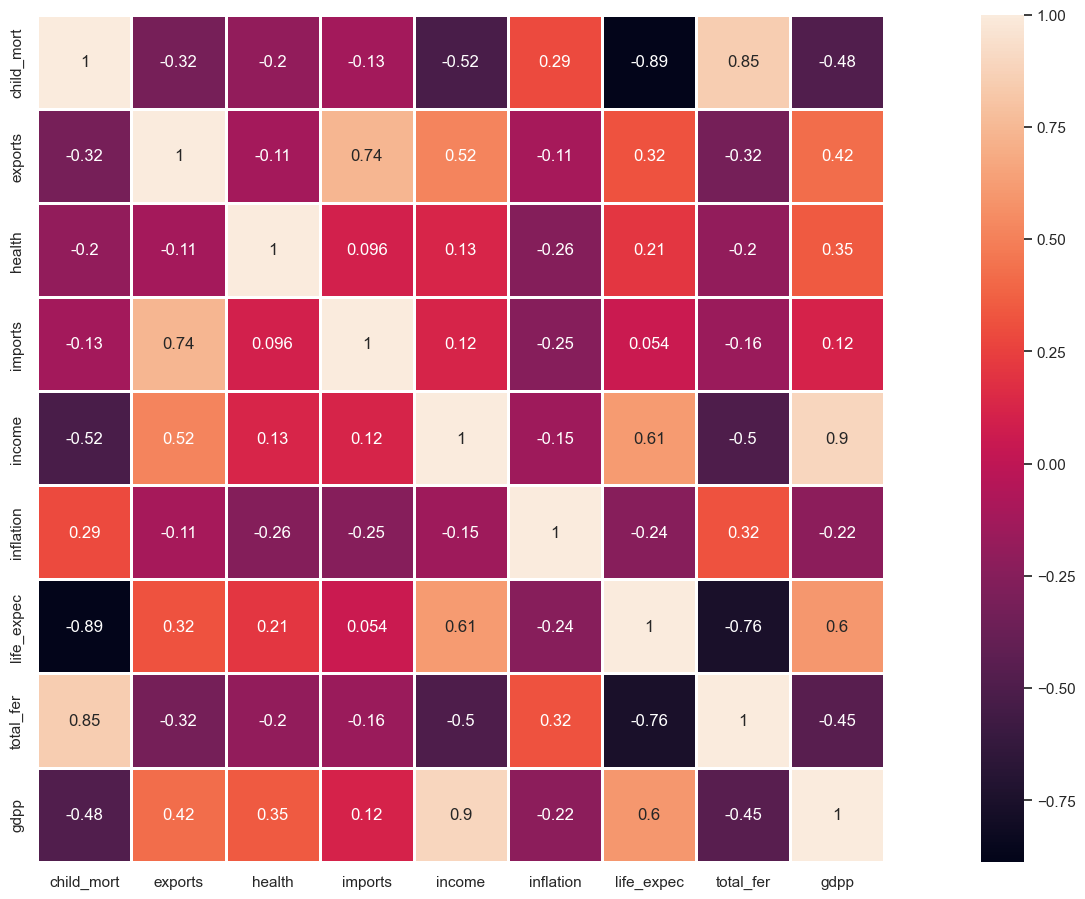

In [25]:
sns.set()
fig, ax = plt.subplots(figsize=(25,11))    
sns.heatmap(pais.corr(), square=True, annot=True, linewidths=2)

In [26]:
le = preprocessing.LabelEncoder() 
pais['country'] = le.fit_transform(pais.country.values)
pais

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [27]:
X = pais.to_numpy()

In [28]:
N = X.shape[0]
K = 4

SSE = []

for i in range(0, N):
  X_sin_i = np.delete(X, i, axis=0)
  kmeans = KMeans(n_clusters=K, n_init=10, random_state=100).fit(X_sin_i)
  SSE.append(kmeans.inertia_)

In [29]:
sigma = np.std(SSE)
mu = np.mean(SSE)

# 2 para distribución normal
# 3 para cualquier otra distribución
umbral = 2

outliers = []
for i in range(0, N):
  if np.abs(SSE[i]-mu) > umbral*sigma:
    outliers.append(i)
print(outliers)

[23, 82, 91, 114, 123, 133, 145]


/Users/aitor/Desktop/sist_aprendizaje_aut.nosync/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


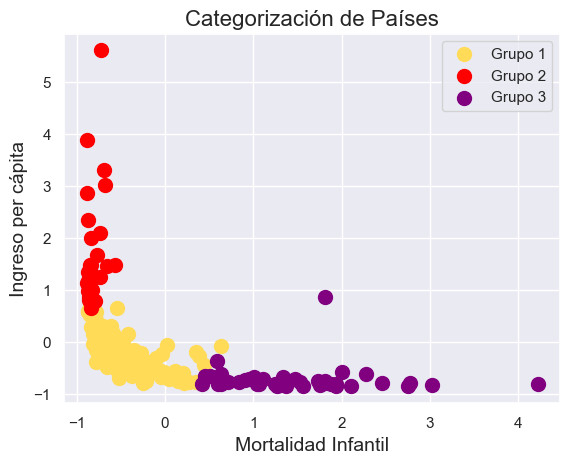

In [30]:
X = pais[["child_mort", "income", "gdpp"]].values

# Escalar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-means para categorizar los países en diferentes grupos
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Graficar los datos y los clusters
plt.scatter(X_scaled[y_kmeans==0, 0], X_scaled[y_kmeans==0, 1], s=100, c='#FFDB58', label='Grupo 1')
plt.scatter(X_scaled[y_kmeans==1, 0], X_scaled[y_kmeans==1, 1], s=100, c='red', label='Grupo 2')
plt.scatter(X_scaled[y_kmeans==2, 0], X_scaled[y_kmeans==2, 1], s=100, c='purple', label='Grupo 3')
plt.title("Categorización de Países", fontsize=16)
plt.xlabel("Mortalidad Infantil", fontsize=14)
plt.ylabel("Ingreso per cápita", fontsize=14)
plt.legend()
plt.show()

In [31]:
# inicializar kmeans
# n_cluster -> numero de grupos ; random_state -> semilla
kmeans = KMeans(n_clusters=2, random_state=10)

# entrenamiento (ajustar el modelo)
kmeans.fit(X)

# prediccion -> devuelve array con el número de grupo al que pretenece cada dato
pred = kmeans.predict(X) # También puede utilizarse kmeans.fit_predict(X) realiza ambas etapas

# obtener centroides de los grupos
centroides = kmeans.cluster_centers_
print(centroides)
pred

[[4.60155556e+01 9.60268889e+03 5.34899259e+03]
 [5.59375000e+00 4.89625000e+04 4.50906250e+04]]


/Users/aitor/Desktop/sist_aprendizaje_aut.nosync/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

/var/folders/30/kj50lt897c9gb579zv_k_5t00000gn/T/ipykernel_5374/3689963247.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


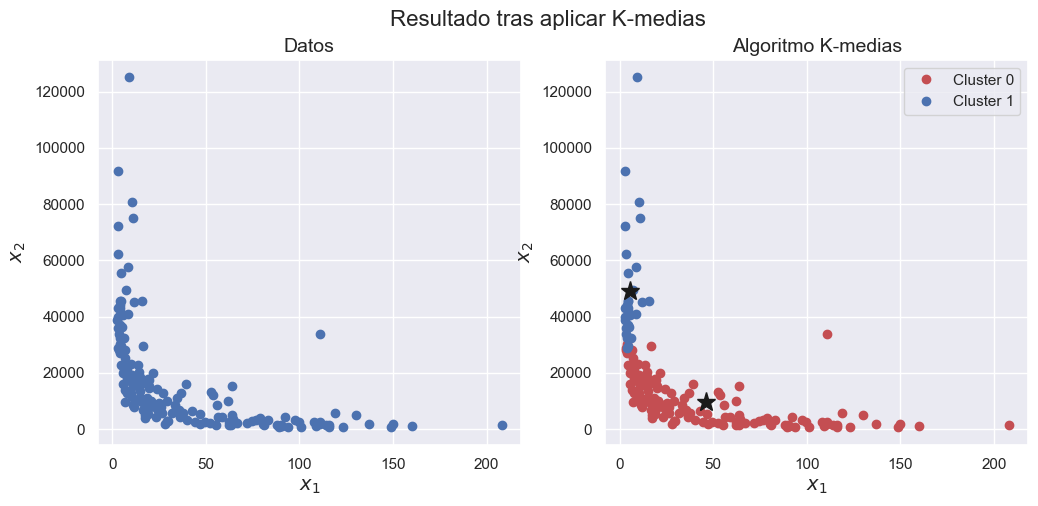

In [32]:
## Representación gráfica de la solución
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 5)
fig.suptitle('Resultado tras aplicar K-medias', fontsize=16)

ax1.plot(X[:20, 0], X[:20, 1], 'bo')
ax1.plot(X[20:, 0], X[20:, 1], 'bo')
ax1.set_title("Datos", fontsize=14)
ax1.set_xlabel(r"$x_1$", fontsize=14)
ax1.set_ylabel(r"$x_2$", fontsize=14)

ax2.plot(X[pred==0, 0], X[pred==0, 1], 'ro', label="Cluster 0") 
ax2.plot(X[pred==1, 0], X[pred==1, 1], 'bo', label="Cluster 1") 
ax2.plot(centroides[:, 0], centroides[:, 1], 'k*', markersize=14) # Dibujamos los centroides
ax2.legend()
ax2.set_title("Algoritmo K-medias", fontsize=14)
ax2.set_xlabel(r"$x_1$", fontsize=14)
ax2.set_ylabel(r"$x_2$", fontsize=14)

fig.show()

In [33]:
def BIC(K, grupos, X):
    filas, columnas = X.shape

    N = filas
    P = columnas

    sumatorio = 0.0
    var_estimada = 0.0

    for k in range(0, K):
        suma_var_estimada = 0.0
        nk =sum(grupos==k)
        for j in range(0, P):
            sigma_j = np.square(np.std(X[:, j]))
            sigma_jk = np.square(np.std(X[grupos==k, j]))
            suma_var_estimada += 0.5 * np.log(sigma_j + sigma_jk)
        
        sumatorio += -nk * suma_var_estimada
    
    homogeneidad = -2 * sumatorio

    coste_centroides = 2 * K * P * np.log(N)
    bic = homogeneidad + coste_centroides
    return bic

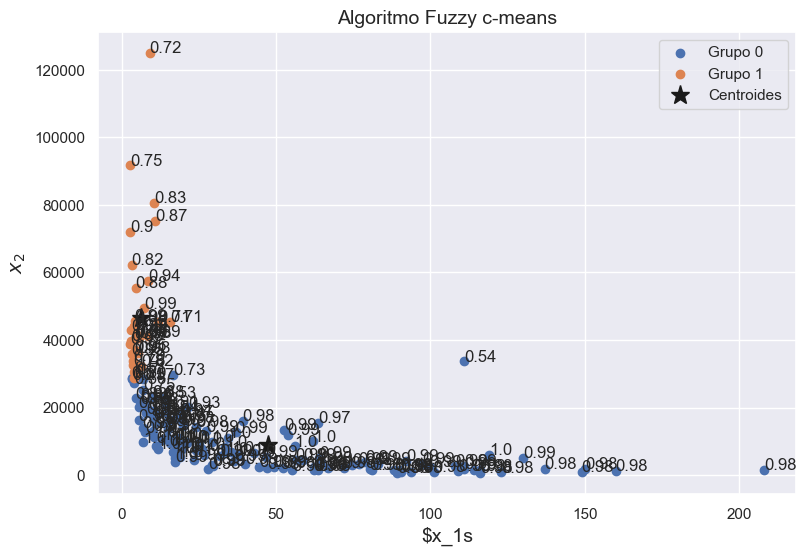

In [34]:
K = 2 # Número de clusters
m = 2 # Parámetro de FCM, 2 es el defecto
tolerancia = 1e-5 # Tolerancia (criterio de parada)
maxiter = 100 # Número máximo de iteraciones

centroides, U, u0, d, jm, p, fpc = cmeans(X.T, K, m, tolerancia, maxiter, seed=100)
# Parámetros de salida:
# - centroides: Centroides
# - U: Matriz de pertenencia de los indiviuos a los clusters
# - u0: Matriz u en la iteración 0
# - d: Matriz de distancias Euclideas en la última iteración # - jm: Historico del valor de la función objetivo # - p: Número de iteraciones
# - fpc: Coeficiente de partición difusa final

# Obtener a que grupo pertenece cada observación
grupos = np.argmax(U, axis=0) # Devuelve los indices del valor máximo sobre el eje 0 (filas)

# Obtener el grado de pertenencia al grupo con mayor pertenencia
maxU = np.amax(U, axis=0) # Devuelve el valor máximo sobre el eje 0 (filas)

# representación

plt.figure(figsize= (9, 6))

for k in range (0, K):
    plt.scatter(X[grupos==k, 0], X[grupos==k, 1], label="Grupo {}".format(k))

for i, maxU_i in enumerate (np.round(maxU, 2)):
    plt.annotate (maxU_i, (X[i, 0], X[i, 1]))

# Dibujamos los centroides
plt.plot(centroides[:, 0], centroides[:, 1], 'k*', markersize=14, label="Centroides")

plt.title ("Algoritmo Fuzzy c-means", fontsize=14)
plt.xlabel (r"$x_1s", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14)
plt.legend()
plt.show()

# 3. Segmentación de jugadores

In [35]:
cod = pd.read_csv('csv/cod.csv')
cod

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
0,RggRt45#4697369,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1,JohniceRex#9176033,0,0,0.000000,0,1,0,110,0,7,0,7.0,0,0,0,700,0.0,0,16
2,bootybootykill#1892064,0,66,1.031250,0,9,0,110,0,32,16,32.0,0,1,0,48300,0.0,0,64
3,JNaCo#5244172,3,2,0.400000,0,1,0,0,0,3,0,3.0,0,0,0,1150,0.0,0,5
4,gomezyayo_007#6596687,0,2,0.200000,0,1,0,110,0,5,1,5.0,0,0,0,1000,0.0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,ImranePROPG#2085215,0,51,0.432203,0,10,0,110,0,71,11,71.0,0,0,0,49935,0.0,0,118
1554,Miguel_mor#1492856,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1555,Trianthor#3462590,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1556,tinytrex594#3976133,0,0,0.000000,0,1,0,0,2,1,0,1.0,0,1,7,0,91.2,9,0


In [36]:
cod.head()

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
0,RggRt45#4697369,0,0,0.00000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1,JohniceRex#9176033,0,0,0.00000,0,1,0,110,0,7,0,7.0,0,0,0,700,0.0,0,16
2,bootybootykill#1892064,0,66,1.03125,0,9,0,110,0,32,16,32.0,0,1,0,48300,0.0,0,64
3,JNaCo#5244172,3,2,0.40000,0,1,0,0,0,3,0,3.0,0,0,0,1150,0.0,0,5
4,gomezyayo_007#6596687,0,2,0.20000,0,1,0,110,0,5,1,5.0,0,0,0,1000,0.0,0,10


In [37]:
cod.tail()

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
1553,ImranePROPG#2085215,0,51,0.432203,0,10,0,110,0,71,11,71.0,0,0,0,49935,0.0,0,118
1554,Miguel_mor#1492856,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1555,Trianthor#3462590,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1556,tinytrex594#3976133,0,0,0.000000,0,1,0,0,2,1,0,1.0,0,1,7,0,91.2,9,0
1557,TomasFJ_05#2711069,1,35,0.686275,3,5,1,110,17,10,6,10.0,1,11,63,17126,39.0,80,51


In [38]:
cod.describe()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
count,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1.558000e+03,1558.000000,1.558000e+03,1558.000000
mean,153.002567,3753.001926,0.637098,6.895379,44.414634,4.998074,47.657253,10330.189987,425.915918,630.672657,21.428416,116.695764,685.797176,45356.671374,8.726335e+05,107.868825,5.568677e+04,3875.397946
std,301.984766,7929.696675,0.430459,10.184677,68.318064,7.005778,51.626213,22954.104384,786.182499,1305.150393,82.640000,256.354836,1518.383825,97919.428339,1.795755e+06,116.526676,1.202811e+05,7992.666443
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,0.000000,4.000000,0.261442,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.106250e+03,0.000000,0.000000e+00,14.000000
50%,10.000000,191.500000,0.732837,5.000000,11.000000,2.000000,14.000000,214.500000,51.000000,32.000000,3.031116,3.000000,36.500000,1307.500000,6.396800e+04,56.793995,1.565000e+03,269.000000
75%,168.000000,3445.750000,0.955293,12.000000,51.000000,8.000000,110.000000,9015.500000,485.500000,602.750000,9.085714,110.500000,609.750000,40906.750000,8.286690e+05,221.648976,5.078100e+04,3698.750000
max,3519.000000,66935.000000,3.000000,235.000000,435.000000,80.000000,117.000000,209851.000000,7479.000000,11719.000000,1349.000000,3745.000000,14531.000000,965775.000000,1.497054e+07,413.800000,1.166620e+06,67888.000000


/var/folders/30/kj50lt897c9gb579zv_k_5t00000gn/T/ipykernel_5374/1845851104.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cod.corr(), square=True, annot=True, linewidths=2)


<Axes: >

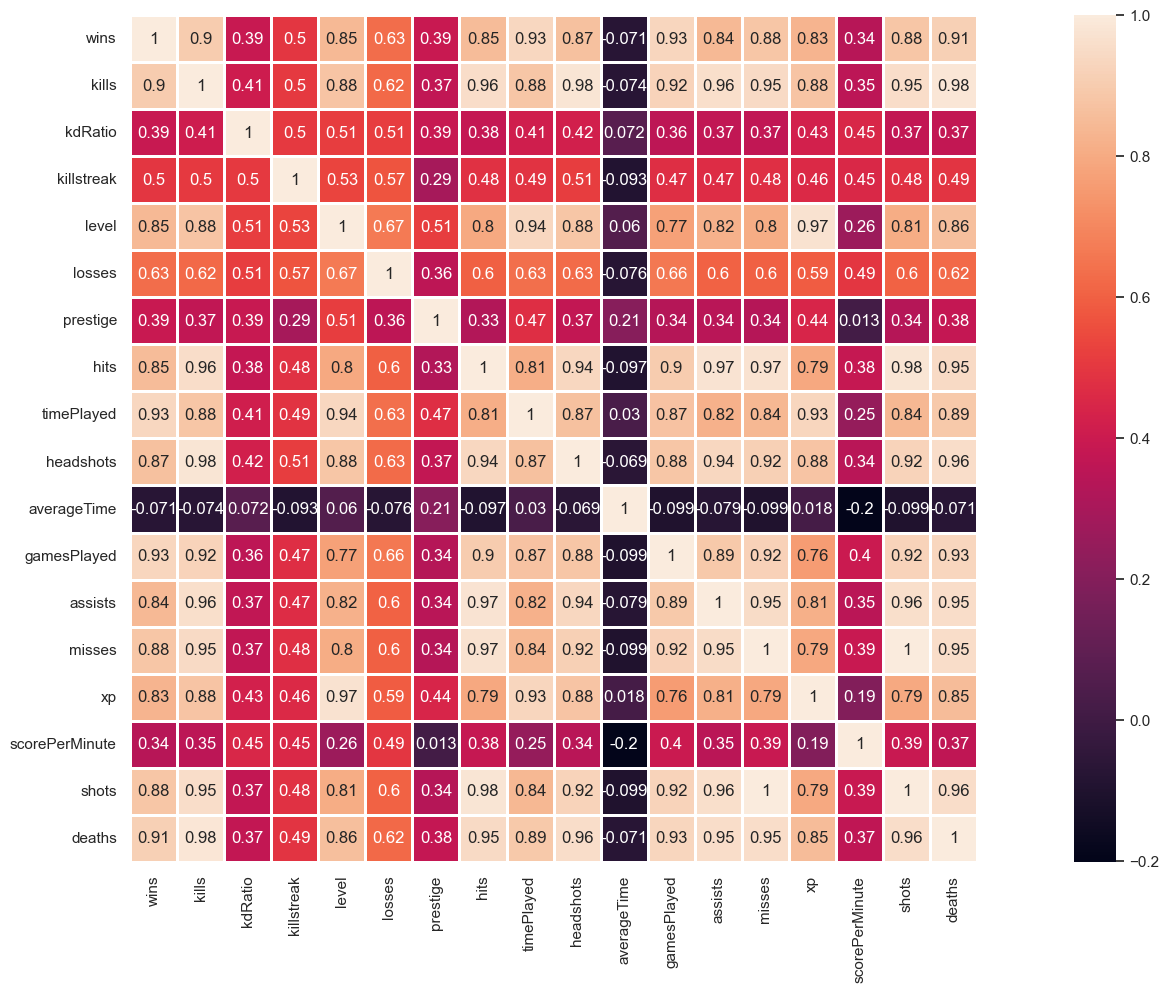

In [39]:
sns.set()
fig, ax = plt.subplots(figsize=(25,11))    
sns.heatmap(cod.corr(), square=True, annot=True, linewidths=2)

In [40]:
cod = cod.drop('name', axis=1)
cod

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
0,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1,0,0,0.000000,0,1,0,110,0,7,0,7.0,0,0,0,700,0.0,0,16
2,0,66,1.031250,0,9,0,110,0,32,16,32.0,0,1,0,48300,0.0,0,64
3,3,2,0.400000,0,1,0,0,0,3,0,3.0,0,0,0,1150,0.0,0,5
4,0,2,0.200000,0,1,0,110,0,5,1,5.0,0,0,0,1000,0.0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,0,51,0.432203,0,10,0,110,0,71,11,71.0,0,0,0,49935,0.0,0,118
1554,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1555,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1556,0,0,0.000000,0,1,0,0,2,1,0,1.0,0,1,7,0,91.2,9,0


In [41]:
X = cod.to_numpy()

In [42]:
N = X.shape[0]
K = 4
SSE = []

for i in range(0, N):
  X_sin_i = np.delete(X, i, axis=0)
  kmeans = KMeans(n_clusters=K, n_init=10, random_state=100).fit(X_sin_i)
  SSE.append(kmeans.inertia_)

In [43]:
sigma = np.std(SSE)
mu = np.mean(SSE)

# 2 para distribución normal
# 3 para cualquier otra distribución
umbral = 2

outliers = []
for i in range(0, N):
  if np.abs(SSE[i]-mu) > umbral*sigma:
    outliers.append(i)
print(outliers)

[186, 416, 661, 708, 808, 1120, 1313, 1526]


/Users/aitor/Desktop/sist_aprendizaje_aut.nosync/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


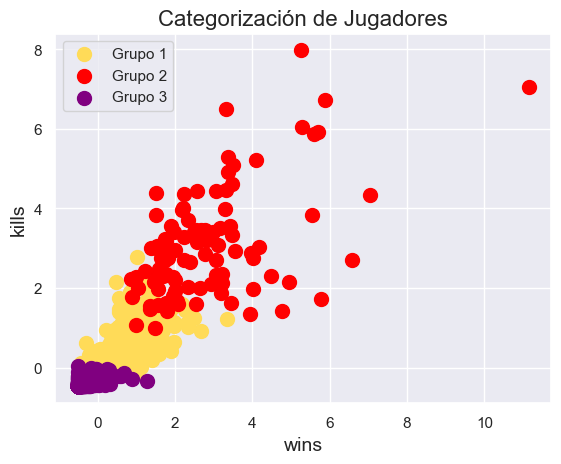

In [44]:
X = cod[["wins", "kills", "kdRatio", "killstreak", "level", "losses", "prestige", "hits", "timePlayed", "headshots", "averageTime", "gamesPlayed", "assists", "misses", "xp", "scorePerMinute", "shots", "deaths"]].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-means para categorizar los países en diferentes grupos
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Graficar los datos y los clusters
plt.scatter(X_scaled[y_kmeans==0, 0], X_scaled[y_kmeans==0, 1], s=100, c='#FFDB58', label='Grupo 1')
plt.scatter(X_scaled[y_kmeans==1, 0], X_scaled[y_kmeans==1, 1], s=100, c='red', label='Grupo 2')
plt.scatter(X_scaled[y_kmeans==2, 0], X_scaled[y_kmeans==2, 1], s=100, c='purple', label='Grupo 3')
plt.title("Categorización de Jugadores", fontsize=16)
plt.xlabel("wins", fontsize=14)
plt.ylabel("kills", fontsize=14)
plt.legend()
plt.show()

In [45]:
# inicializar kmeans
# n_cluster -> numero de grupos ; random_state -> semilla
kmeans = KMeans(n_clusters=2, random_state=10)

# entrenamiento (ajustar el modelo)
kmeans.fit(X)

# prediccion -> devuelve array con el número de grupo al que pretenece cada dato
pred = kmeans.predict(X) # También puede utilizarse kmeans.fit_predict(X) realiza ambas etapas

# obtener centroides de los grupos
centroides = kmeans.cluster_centers_
print(centroides)
pred

[[8.11904422e+01 1.74351070e+03 5.93848403e-01 5.62054208e+00
  2.56918688e+01 3.91583452e+00 4.15898716e+01 5.09371826e+03
  2.15045649e+02 3.06411555e+02 2.24042756e+01 6.04985735e+01
  3.23600571e+02 2.29109486e+04 3.62854064e+05 1.03032687e+02
  2.80046669e+04 1.87899073e+03]
 [7.98391026e+02 2.18126603e+04 1.02579176e+00 1.83525641e+01
  2.12679487e+02 1.47243590e+01 1.02185897e+02 5.73913013e+04
  2.32104487e+03 3.54486538e+03 1.26581872e+01 6.21750000e+02
  3.94092308e+03 2.47080410e+05 5.45411270e+06 1.51332070e+02
  3.04470788e+05 2.18174679e+04]]


/Users/aitor/Desktop/sist_aprendizaje_aut.nosync/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

/var/folders/30/kj50lt897c9gb579zv_k_5t00000gn/T/ipykernel_5374/3689963247.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


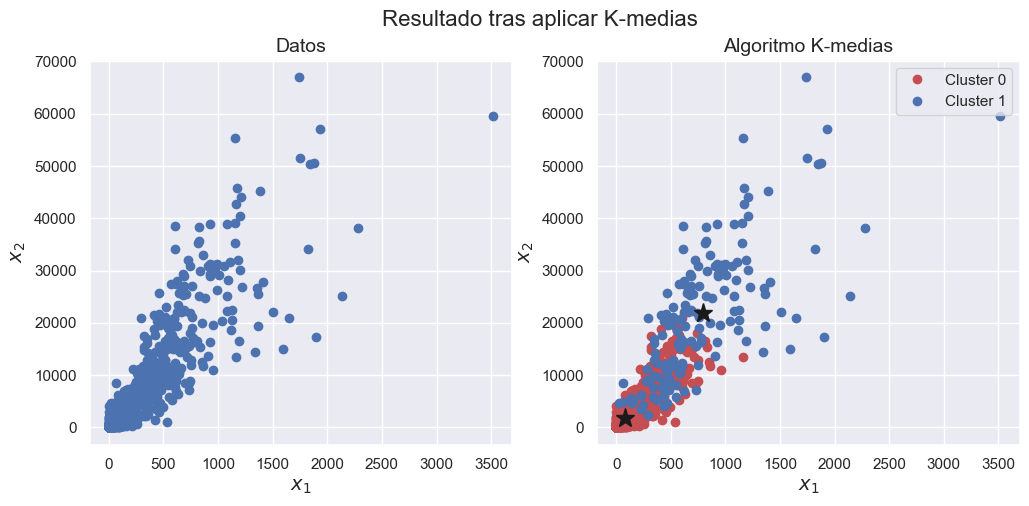

In [46]:
## Representación gráfica de la solución
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 5)
fig.suptitle('Resultado tras aplicar K-medias', fontsize=16)

ax1.plot(X[:20, 0], X[:20, 1], 'bo')
ax1.plot(X[20:, 0], X[20:, 1], 'bo')
ax1.set_title("Datos", fontsize=14)
ax1.set_xlabel(r"$x_1$", fontsize=14)
ax1.set_ylabel(r"$x_2$", fontsize=14)

ax2.plot(X[pred==0, 0], X[pred==0, 1], 'ro', label="Cluster 0") 
ax2.plot(X[pred==1, 0], X[pred==1, 1], 'bo', label="Cluster 1") 
ax2.plot(centroides[:, 0], centroides[:, 1], 'k*', markersize=14) # Dibujamos los centroides
ax2.legend()
ax2.set_title("Algoritmo K-medias", fontsize=14)
ax2.set_xlabel(r"$x_1$", fontsize=14)
ax2.set_ylabel(r"$x_2$", fontsize=14)

fig.show()

In [47]:
def BIC(K, grupos, X):
    filas, columnas = X.shape

    N = filas
    P = columnas

    sumatorio = 0.0
    var_estimada = 0.0

    for k in range(0, K):
        suma_var_estimada = 0.0
        nk =sum(grupos==k)
        for j in range(0, P):
            sigma_j = np.square(np.std(X[:, j]))
            sigma_jk = np.square(np.std(X[grupos==k, j]))
            suma_var_estimada += 0.5 * np.log(sigma_j + sigma_jk)
        
        sumatorio += -nk * suma_var_estimada
    
    homogeneidad = -2 * sumatorio

    coste_centroides = 2 * K * P * np.log(N)
    bic = homogeneidad + coste_centroides
    return bic

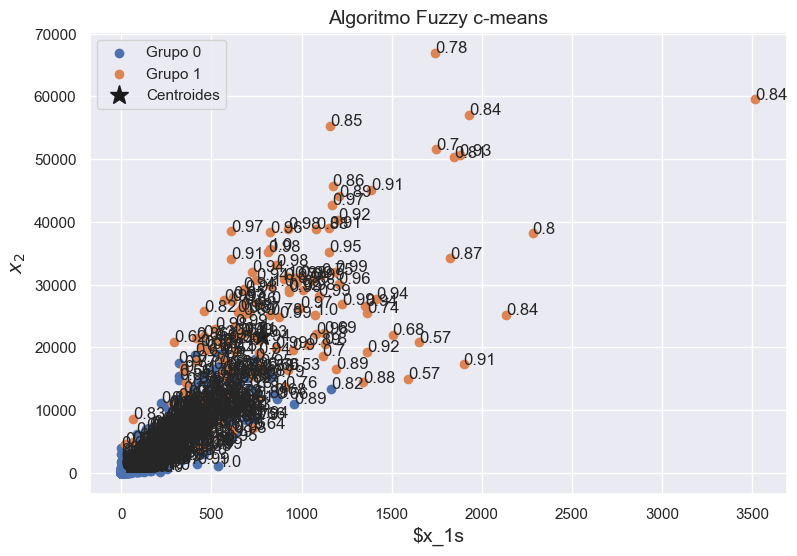

In [48]:
K = 2 # Número de clusters
m = 2 # Parámetro de FCM, 2 es el defecto
tolerancia = 1e-5 # Tolerancia (criterio de parada)
maxiter = 100 # Número máximo de iteraciones

centroides, U, u0, d, jm, p, fpc = cmeans(X.T, K, m, tolerancia, maxiter, seed=100)
# Parámetros de salida:
# - centroides: Centroides
# - U: Matriz de pertenencia de los indiviuos a los clusters
# - u0: Matriz u en la iteración 0
# - d: Matriz de distancias Euclideas en la última iteración # - jm: Historico del valor de la función objetivo # - p: Número de iteraciones
# - fpc: Coeficiente de partición difusa final

# Obtener a que grupo pertenece cada observación
grupos = np.argmax(U, axis=0) # Devuelve los indices del valor máximo sobre el eje 0 (filas)

# Obtener el grado de pertenencia al grupo con mayor pertenencia
maxU = np.amax(U, axis=0) # Devuelve el valor máximo sobre el eje 0 (filas)

# representación

plt.figure(figsize= (9, 6))

for k in range (0, K):
    plt.scatter(X[grupos==k, 0], X[grupos==k, 1], label="Grupo {}".format(k))

for i, maxU_i in enumerate (np.round(maxU, 2)):
    plt.annotate (maxU_i, (X[i, 0], X[i, 1]))

# Dibujamos los centroides
plt.plot(centroides[:, 0], centroides[:, 1], 'k*', markersize=14, label="Centroides")

plt.title ("Algoritmo Fuzzy c-means", fontsize=14)
plt.xlabel (r"$x_1s", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14)
plt.legend()
plt.show()